<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/U_Net(%EC%9B%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(16, 128, 128, 1))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6643 - loss: 0.6867

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6881 - loss: 0.6852 - val_accuracy: 0.9754 - val_loss: 0.6454
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9829 - loss: 0.6244 - val_accuracy: 0.9647 - val_loss: 0.4862
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9617 - loss: 0.3875 - val_accuracy: 0.9831 - val_loss: 0.1432
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9877 - loss: 0.1138 - val_accuracy: 0.9930 - val_loss: 0.0465
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9878 - loss: 0.0403 - val_accuracy: 0.9899 - val_loss: 0.0263
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9898 - loss: 0.0282 - val_accuracy: 0.9861 - val_loss: 0.0360
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9873 - loss: 0.0325 - val_accuracy: 0.9909 - val_loss: 0.0222
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9917 - loss: 0.0197 - val_accuracy: 0.9945 - val_loss: 0.0162
Epoch 9/50
5/5 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 128, 128, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


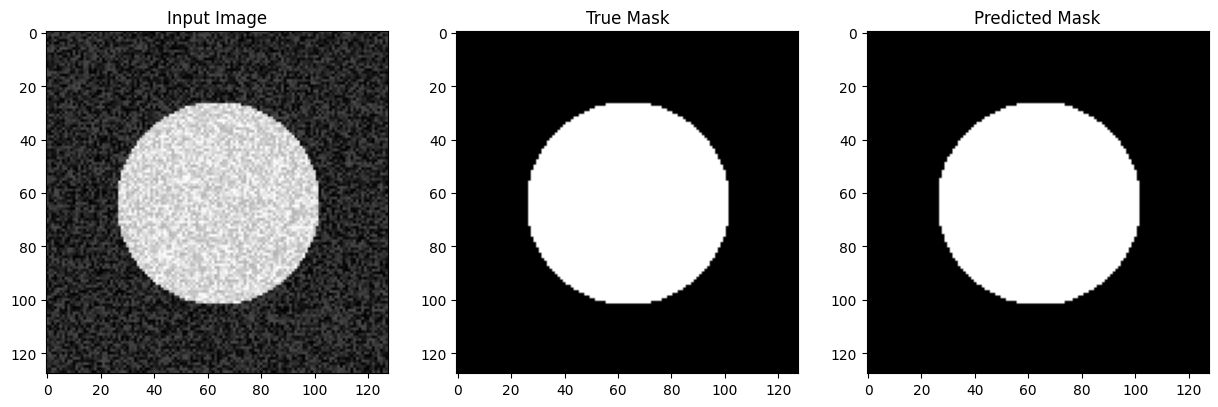

In [1]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 데이터 준비
def create_mask(size):
    mask = np.zeros((size, size, 1), dtype=np.float32)
    # Create a random shape (circle or rectangle)
    if np.random.rand() > 0.5:  # circle
        center = size // 2
        radius = np.random.randint(size // 6, size // 3)
        for i in range(size):
            for j in range(size):
                if (i - center)**2 + (j - center)**2 < radius**2:
                    mask[i, j] = 1
    else:  # rectangle
        x1, y1 = np.random.randint(0, size // 3), np.random.randint(0, size // 3)
        x2, y2 = np.random.randint(2 * size // 3, size), np.random.randint(2 * size // 3, size)
        mask[x1:x2, y1:y2] = 1
    return mask

# Generate 100 samples
n_samples = 100
size = 128
X_train = []
y_train = []
for _ in range(n_samples):
    # Image (random noise with a shape)
    img = np.random.rand(size, size, 1) * 0.3  # Low intensity noise
    mask = create_mask(size)
    img += mask * 0.7  # Add the shape in higher intensity
    X_train.append(img)
    y_train.append(mask)

X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')

# U-Net 모델 정의 (as before)
def build_unet(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bridge
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u1 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
    u1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)
    u2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# 모델 생성, 컴파일
model = build_unet((128, 128, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# 추론 및 시각화
X_test = X_train[:1]  # Use one sample from the training set for demonstration
predictions = model.predict(X_test)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(np.uint8)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(X_test[0,:,:,0], cmap='gray')
plt.title('Input Image')
plt.subplot(1, 3, 2)
plt.imshow(y_train[0,:,:,0], cmap='gray')
plt.title('True Mask')
plt.subplot(1, 3, 3)
plt.imshow(binary_predictions[0,:,:,0], cmap='gray')
plt.title('Predicted Mask')
plt.show()